# Sensor Projection

*To be completed...*

## Setup

In [316]:
import sys

! {sys.executable} -m pip install --quiet numpy --upgrade
! {sys.executable} -m pip install --quiet plotly

# ! {sys.executable} -m pip install --quiet --index-url https://test.pypi.org/simple/ LibraryCorePy==0.1.9
# ! {sys.executable} -m pip install --quiet --index-url https://test.pypi.org/simple/ LibraryMathematicsPy==0.1.5
# ! {sys.executable} -m pip install --quiet --index-url https://test.pypi.org/simple/ LibraryPhysicsPy==0.1.3

In [317]:
import numpy as np
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [318]:
import Library.Core as Core
import Library.Mathematics as Mathematics
import Library.Physics as Physics

In [319]:
Object2 = Mathematics.Geometry.D2.Object
Point2 = Mathematics.Geometry.D2.Objects.Point
Polygon2 = Mathematics.Geometry.D2.Objects.Polygon
Point3 = Mathematics.Geometry.D3.Objects.Point
Polygon3 = Mathematics.Geometry.D3.Objects.Polygon
Ellipsoid = Mathematics.Geometry.D3.Objects.Ellipsoid
Pyramid = Mathematics.Geometry.D3.Objects.Pyramid

Length = Physics.Units.Length
Angle = Physics.Units.Angle
Scale = Physics.Time.Scale
Instant = Physics.Time.Instant
Duration = Physics.Time.Duration
Interval = Physics.Time.Interval
DateTime = Physics.Time.DateTime
LLA = Physics.Coordinate.Spherical.LLA
Position = Physics.Coordinate.Position
Frame = Physics.Coordinate.Frame
Environment = Physics.Environment
Geometry = Physics.Environment.Object.Geometry
Earth = Physics.Environment.Objects.CelestialBodies.Earth

---

## Scene

Set up a simple scene, with the Earth only.

In [320]:
environment = Environment.Default() ;

In [321]:
earth = environment.accessObjectWithName("Earth")

In [322]:
earth_geometry = earth.getGeometryIn(Frame.ITRF())

In [323]:
# print(earth_geometry)

## Pyramidal

Setup pyramidal observer

In [324]:
apex = Point3(7000e3, 0.0, 0.0)
base = Polygon3(Polygon2([Point2(-1.0, -1.0), Point2(+1.0, -1.0), Point2(+1.0, +1.0), Point2(-1.0, +1.0)]), apex - np.array((0.8, 0.0, 0.0)), np.array((0.0, 1.0, 0.0)), np.array((0.0, 0.0, 1.0)))

pyramid = Pyramid(base, apex)

In [325]:
observer_geometry = Geometry(pyramid, Frame.ITRF())

In [326]:
# observer_geometry

In [327]:
intersection_ITRF = observer_geometry.intersectionWith(earth_geometry)

In [328]:
# intersection_ITRF

In [329]:
intersection_points = [Point2(lla.getLongitude().inDegrees(), lla.getLatitude().inDegrees()) for lla in [LLA.Cartesian(point_ITRF, Earth.EquatorialRadius, Earth.Flattening) for point_ITRF in intersection_ITRF.asLineString()]]

In [330]:
intersection_polygon = Polygon2(intersection_points)

In [331]:
intersection_df = pd.DataFrame([[intersection_point.x(), intersection_point.y()] for intersection_point in intersection_points], columns=['Longitude', 'Latitude']) ;

In [332]:
intersection_df.head()

Longitude  Latitude
0  -8.768124 -8.724736
1  -8.152094 -5.915820
2  -7.861145 -3.893102
3  -7.713093 -2.226168
4  -7.649121 -0.725558

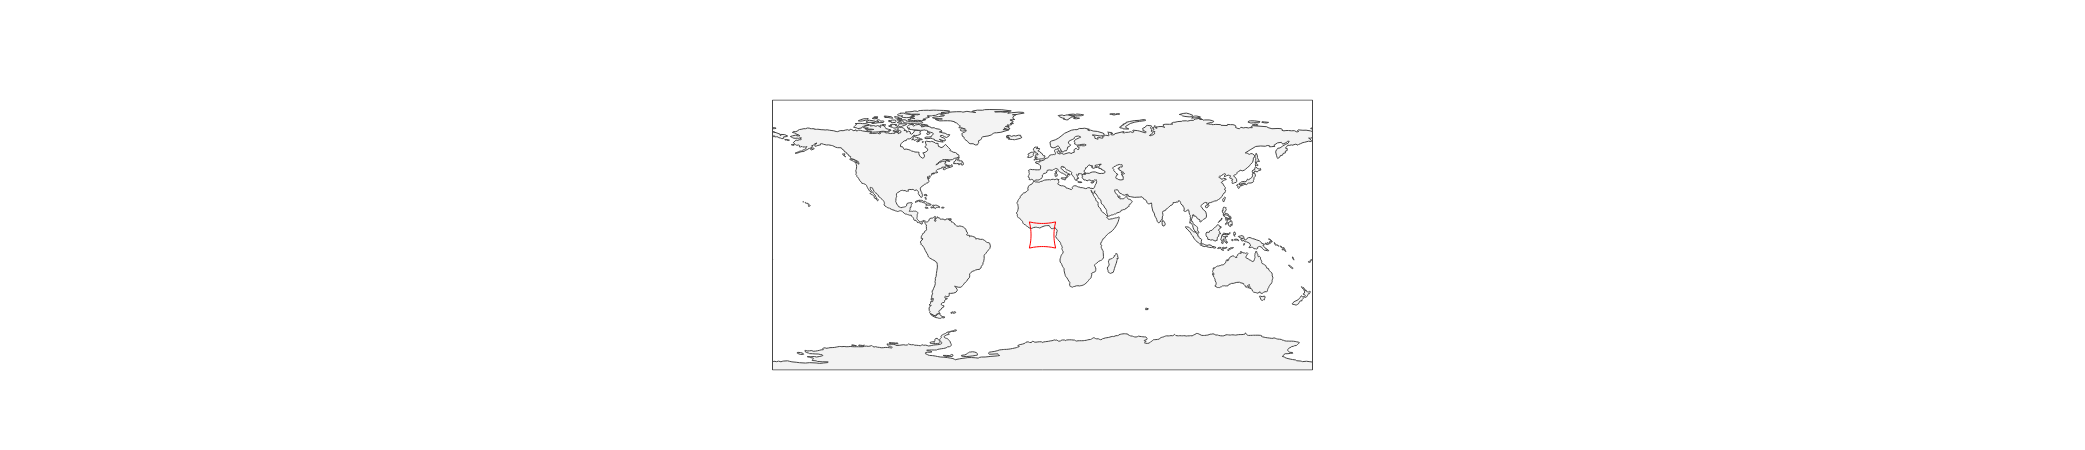

In [333]:
data = []

data.append(
    dict(
        type = 'scattergeo',
        lon = intersection_df['Longitude'],
        lat = intersection_df['Latitude'],
        mode = 'lines',
        line = dict(
            width = 1,
            color = 'red',
        )
    )
)
    
layout = dict(
        title = None,
        showlegend = False, 
        geo = dict(
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict(data=data, layout=layout)
iplot(fig)

In [334]:
intersection_polygon.toString(Object2.Format.WKT)

POLYGON((-8.76812 -8.72474,-8.15209 -5.91582,-7.86115 -3.8931,-7.71309 -2.22617,-7.64912 -0.725558,-7.64912 0.725558,-7.71309 2.22617,-7.86115 3.8931,-8.15209 5.91582,-8.76812 8.72474,-8.76812 8.72474,-5.93864 8.16638,-3.90612 7.90016,-2.23303 7.76407,-0.727715 7.70514,0.727715 7.70514,2.23303 7.76407,3.90612 7.90016,5.93864 8.16638,8.76812 8.72474,8.76812 8.72474,8.15209 5.91582,7.86115 3.8931,7.71309 2.22617,7.64912 0.725558,7.64912 -0.725558,7.71309 -2.22617,7.86115 -3.8931,8.15209 -5.91582,8.76812 -8.72474,8.76812 -8.72474,5.93864 -8.16638,3.90612 -7.90016,2.23303 -7.76407,0.727715 -7.70514,-0.727715 -7.70514,-2.23303 -7.76407,-3.90612 -7.90016,-5.93864 -8.16638,-8.76812 -8.72474))